In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/smartknower-mini project/delhi_house.csv')

In [ ]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [ ]:

df=df.drop(['Locality','Parking','Status','Transaction','Per_Sqft'],axis=1)

In [ ]:
df

,Area,BHK,Bathroom,Furnishing,Price,Type
0,800.0,3,2.0,Semi-Furnished,6500000,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,5000000,Apartment
2,950.0,2,2.0,Furnished,15500000,Apartment
3,600.0,2,2.0,Semi-Furnished,4200000,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,6200000,Builder_Floor
...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,55000000,Builder_Floor
1255,1050.0,3,2.0,Semi-Furnished,12500000,Builder_Floor
1256,875.0,3,3.0,Semi-Furnished,17500000,Builder_Floor
1257,990.0,2,2.0,Unfurnished,11500000,Builder_Floor


In [ ]:

df.isnull().sum()

Area          0
BHK           0
Bathroom      2
Furnishing    5
Price         0
Type          5
dtype: int64

In [ ]:
df["Bathroom"].fillna(df["Bathroom"].median(),inplace=True)
df["Furnishing"].fillna(method='ffill',inplace=True)
df["Type"].fillna(method='ffill',inplace=True)

In [ ]:
df.isnull().sum()

Area          0
BHK           0
Bathroom      0
Furnishing    0
Price         0
Type          0
dtype: int64

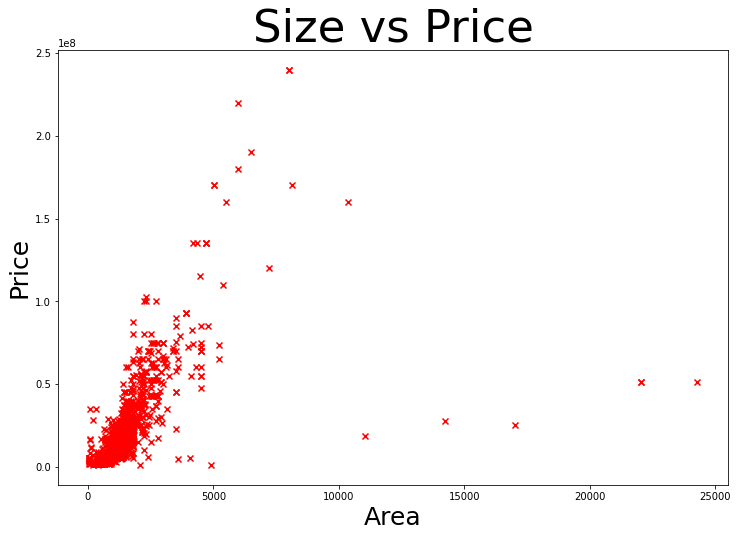

In [ ]:
fig=plt.figure(figsize=(12,8))
plt.scatter(df['Area'],df['Price'],label='',color='r',marker='x')
plt.xlabel('Area',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.title('Size vs Price',fontsize=45)
plt.show()

In [ ]:
m1=df['Price'].mean()
s1=df['Price'].std()
z1=[]
for i in range(0,1258):
  z=(df['Price'][i]-m1)/s1
  z1.append(z)
for i in range(0,1258):
  if z1[i]>1.8 or z1[i]<-1.8:
    df.drop(df.index[i])



In [ ]:
x = df.iloc[:,[0]].values
y=df.iloc[:,[4]].values


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) 
y_pred = model.predict(x_test)


In [ ]:
from sklearn import metrics
 
metrics.mean_squared_error(y_test,y_pred)

468225622502422.1

In [ ]:
metrics.r2_score(y_test,y_pred)

0.40572341838319526

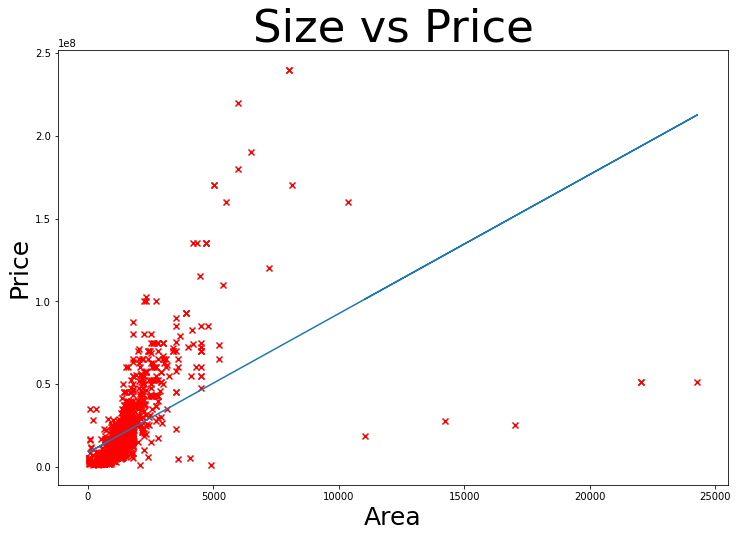

In [ ]:
fig=plt.figure(figsize=(12,8))
plt.scatter(df['Area'],df['Price'],label='',color='r',marker='x')
plt.xlabel('Area',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.title('Size vs Price',fontsize=45)
plt.plot(x,model.predict(x))
plt.show()